In [2]:

# WEB SCRAPING "JobStreet" Daerah Yogyakarta Kategori Teknologi Informasi & Komunikasi

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd

options = Options()
options.add_argument('--headless')
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')

driver = webdriver.Chrome(options=options)
driver.get("https://id.jobstreet.com/id/jobs-in-information-communication-technology/in-DI-Yogyakarta")

soup = BeautifulSoup(driver.page_source, "html.parser")
# print(soup)

cards = soup.select("article")

data = []

for card in cards:
    loker_tag = card.select_one("h3")
    pt_tag = card.select_one("a[data-automation='jobCompany']")
    daerah_tag = card.select_one("a[data-automation='jobLocation']")
    gaji_tag = card.select_one("span[data-automation='jobSalary']")

    loker = loker_tag if loker_tag else "Tidak Di Tampilkan"
    pt = pt_tag if pt_tag else None
    daerah = daerah_tag if daerah_tag else "Tidak Di Tampilkan"
    gaji = gaji_tag if gaji_tag else "Tidak Di Tampilkan"
    
    data.append([loker, pt, daerah, gaji])
    
df = pd.DataFrame(data, columns=["Nama Lowongan","Perusahaan","Daerah","Gaji"])
print(df)


                                        Nama Lowongan  \
0    [[[Network Engineer On Site (Yogyakarta Area)]]]   
1                               [[[System Engineer]]]   
2                              [[[Network Engineer]]]   
3              [[[System Administrator (Sys-Admin)]]]   
4                              [[[IT SPV (English)]]]   
5                                    [[[IT Support]]]   
6          [[[Maintenance Technician (Fiber Optic)]]]   
7                    [[[Software Quality Assurance]]]   
8   [[[Admin MIS (Systems Management/ Database Adm...   
9                          [[[Full Stack Developer]]]   
10                   [[[Fullstack Developer (.NET)]]]   
11                                   [[[Programmer]]]   
12  [[[Software Engineer (.Net) - Onsite at Sleman...   
13  [[[Tech Lead / Senior Software Developer (Pyth...   
14                             [[[Technical Writer]]]   
15                   [[[Fullstack Developer (Java)]]]   
16                    [[[Techni

In [ ]:

# Cleansing Data
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("mysql+pymysql://root:@localhost:3306/joobsteet_yogya_db")

options = Options()
options.add_argument('--headless')
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')

driver = webdriver.Chrome(options=options)
driver.get("https://id.jobstreet.com/id/jobs-in-information-communication-technology/in-DI-Yogyakarta")

soup = BeautifulSoup(driver.page_source, "html.parser")
# print(soup)

cards = soup.select("article")

data = []

for card in cards:
    loker_tag = card.select_one("h3")
    pt_tag = card.select_one("a[data-automation='jobCompany']")
    daerah_tag = card.select_one("a[data-automation='jobLocation']")
    gaji_tag = card.select_one("span[data-automation='jobSalary']")

    loker = loker_tag.get_text(strip=True) if loker_tag else "Tidak Di Tampilkan"
    pt = pt_tag.get_text(strip=True) if pt_tag else None
    daerah = daerah_tag.get_text(strip=True) if daerah_tag else "Tidak Di Tampilkan"
    gaji = gaji_tag.get_text(strip=True) if gaji_tag else "Tidak Di Tampilkan"
    
    data.append([loker, pt, daerah, gaji])
    
df = pd.DataFrame(data, columns=["nama_lowongan","Perusahaan","Daerah","Gaji"])

# Menghilangkan Text Yang Tidak Perlu
df["nama_lowongan"] = df["nama_lowongan"].str.replace("/", "", regex=False)
df["nama_lowongan"] = df["nama_lowongan"].str.replace("(", "", regex=False)
df["nama_lowongan"] = df["nama_lowongan"].str.replace(")", "", regex=False)

df["Perusahaan"] = df["Perusahaan"].str.replace("(", "", regex=False)
df["Perusahaan"] = df["Perusahaan"].str.replace(")", "", regex=False)

# Menghapus Lowongan Kerja Dengan Gaji Yang Tidak Di Tampilkan
# Dan Menghilangkan Text Yang Tidak Perlu
df = df[df['Gaji'] != "Tidak Di Tampilkan"]  
df['Gaji'] = df['Gaji'].str.replace('Rp', '', regex=False)
df['Gaji'] = df['Gaji'].str.replace('per month', '', regex=False)
df['Gaji'] = df['Gaji'].str.replace('/', '', regex=False)
df['Gaji'] = df['Gaji'].str.replace('–', '-')
df['Gaji'] = df['Gaji'].str.replace(',', '.') 
df['Gaji'] = df['Gaji'].str.strip()

df = df.dropna(subset=['Gaji'])
# Export ke Excell
df.to_excel("lowongan.xlsx", index=False)
# Export To SQL
df.to_sql('lowongan', con=engine, if_exists='append', index=False)

print(df)



                                        nama_lowongan                                         Perusahaan         Daerah                     Gaji
3                                      IT SPV English                            PT Indotel Maju Bersama     Yogyakarta  9.000.000 -  10.000.000
7   Admin MIS Systems Management Database Administ...  PT. Infomedia Nusantara Telkom Group Site Jogj...  DI Yogyakarta   3.709.355 -  4.108.600
10  Tech Lead  Senior Software Developer PythonDjango                  PT Mindo Small Business Solutions     Yogyakarta   5.000.000 -  7.000.000
15                     Tech Admin and Privacy Support                                PT. Dias Naga Alpha         Sleman   3.000.000 -  3.500.000
17                              Automation Programmer                  PT Mindo Small Business Solutions     Yogyakarta   4.000.000 -  6.000.000
18                                         Programmer                           PT Marel Sukses Pratamaa         Sleman   2.400.00

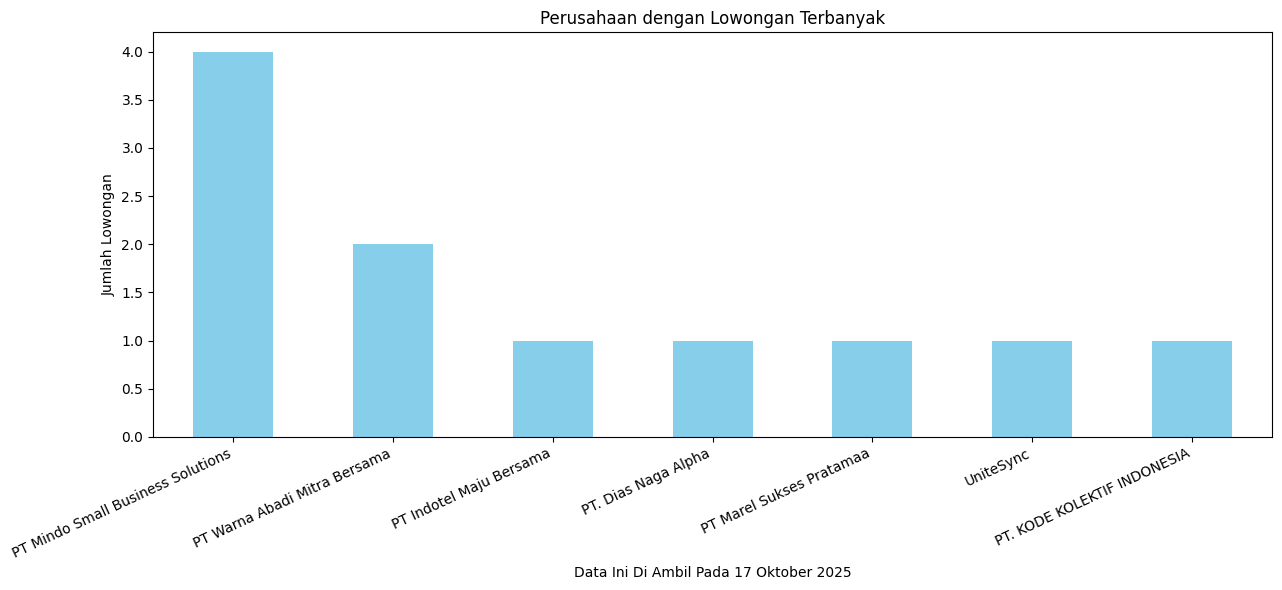

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


engine = create_engine("mysql+pymysql://root:@localhost:3306/joobsteet_yogya_db")

options = Options()
options.add_argument('--headless')
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')

driver = webdriver.Chrome(options=options)
driver.get("https://id.jobstreet.com/id/jobs-in-information-communication-technology/in-DI-Yogyakarta")

soup = BeautifulSoup(driver.page_source, "html.parser")
# print(soup)

cards = soup.select("article")

data = []

for card in cards:
    loker_tag = card.select_one("h3")
    pt_tag = card.select_one("a[data-automation='jobCompany']")
    daerah_tag = card.select_one("a[data-automation='jobLocation']")
    gaji_tag = card.select_one("span[data-automation='jobSalary']")

    loker = loker_tag.get_text(strip=True) if loker_tag else "Tidak Di Tampilkan"
    pt = pt_tag.get_text(strip=True) if pt_tag else None
    daerah = daerah_tag.get_text(strip=True) if daerah_tag else "Tidak Di Tampilkan"
    gaji = gaji_tag.get_text(strip=True) if gaji_tag else "Tidak Di Tampilkan"
    
    data.append([loker, pt, daerah, gaji])
    
df = pd.DataFrame(data, columns=["nama_lowongan","Perusahaan","Daerah","Gaji"])

# Menghilangkan Text Yang Tidak Perlu
df["nama_lowongan"] = df["nama_lowongan"].str.replace("/", "", regex=False)
df["nama_lowongan"] = df["nama_lowongan"].str.replace("(", "", regex=False)
df["nama_lowongan"] = df["nama_lowongan"].str.replace(")", "", regex=False)

df["Perusahaan"] = df["Perusahaan"].str.replace("(", "", regex=False)
df["Perusahaan"] = df["Perusahaan"].str.replace(")", "", regex=False)

# Menghapus Lowongan Kerja Dengan Gaji Yang Tidak Di Tampilkan
# Dan Menghilangkan Text Yang Tidak Perlu
df = df[df['Gaji'] != "Tidak Di Tampilkan"]  
df['Gaji'] = df['Gaji'].str.replace('Rp', '', regex=False)
df['Gaji'] = df['Gaji'].str.replace('per month', '', regex=False)
df['Gaji'] = df['Gaji'].str.replace('/', '', regex=False)
df['Gaji'] = df['Gaji'].str.replace('–', '-')
df['Gaji'] = df['Gaji'].str.replace(',', '.') 
df['Gaji'] = df['Gaji'].str.strip()

df = df.dropna(subset=['Gaji'])
# Export ke Excell
# df.to_excel("lowongan.xlsx", index=False)
# Export To SQL
# df.to_sql('lowongan', con=engine, if_exists='append', index=False)
# print(df)

# Berikut Adalah Chart Tentang Perusahaan Dengan Pasang Lowongan Terbanyak
top_perusahaan = df['Perusahaan'].value_counts().head(10).astype(int)
plt.figure(figsize=(13,6))
top_perusahaan.plot(kind='bar', color='skyblue')
plt.title('Perusahaan dengan Lowongan Terbanyak')
plt.xlabel('Data Ini Di Ambil Pada 17 Oktober 2025')
plt.ylabel('Jumlah Lowongan')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

